In [17]:
from utils.analysis import Signal
from utils.plotter import Hist, Hist2d
from utils.files import *
from utils.varUtils import *
from utils.useCMSstyle import *
plt.style.use(CMS)
import awkward as ak

In [2]:
tree = Signal(get_presel(1200,1000))

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/NMSSM_cutflow_studies/presel/NMSSM_XYH_YToHH_6b_MX_1200_MY_1000/ntuple.root


In [3]:
from utils.analysis.particle import Particle

In [4]:
HX_mask = ak.sum((tree.jet_signalId == 0) | (tree.jet_signalId == 1), axis=1) == 2
H1_mask = ak.sum((tree.jet_signalId == 2) | (tree.jet_signalId == 3), axis=1) == 2
H2_mask = ak.sum((tree.jet_signalId == 4) | (tree.jet_signalId == 5), axis=1) == 2

In [5]:
reco_bs = []
for i in range(6):
    if i == 0 or i == 1: mask = HX_mask
    if i == 2 or i == 3: mask = H1_mask
    if i == 4 or i == 5: mask = H2_mask

    particle = Particle(kin_dict={
        'pt' : tree.jet_ptRegressed[tree.jet_signalId == i][mask],
        'eta' : tree.jet_eta[tree.jet_signalId == i][mask],
        'phi' : tree.jet_phi[tree.jet_signalId == i][mask],
        'm' : tree.jet_m[tree.jet_signalId == i][mask]
    })

    reco_bs.append(particle)

In [6]:
HX = reco_bs[0] + reco_bs[1]
H1 = reco_bs[2] + reco_bs[3]
H2 = reco_bs[4] + reco_bs[5]

HX_bb_dR = reco_bs[0].deltaR(reco_bs[1])
H1_bb_dR = reco_bs[2].deltaR(reco_bs[3])
H2_bb_dR = reco_bs[4].deltaR(reco_bs[5])

In [7]:
tree.mxmy

'MX_1200_MY_1000'

In [8]:
higgs_label = ['HX']*2 + ['H1']*2 + ['H2']*2
b_label = ['b1', 'b2']*3

In [9]:
# fig, ax = plt.subplots()

# for reco_b,h,b in zip(reco_bs,higgs_label,b_label):
#     _ = Hist(reco_b.pt, bins=np.linspace(0,600,41), ax=ax, weights=tree.scale, label=f"{h} {b}")
# # _ = Hist(H1.pt, bins=np.linspace(0,400,41), ax=ax, weights=tree.scale, label='H1')
# # _ = Hist(H2.pt, bins=np.linspace(0,400,41), ax=ax, weights=tree.scale, label='H2')

# ax.legend()

# ax.set_xlabel(r"Reco $p_T$ [GeV]")
# ax.set_ylabel('AU')

# ax.set_title(tree.sample)

# fig.savefig(f"plots/1_signal_exploration/topology/{tree.mxmy}_b_pt.pdf")

In [10]:
all_H_mask = HX_mask & H1_mask & H2_mask

In [11]:
reco_b_all_H = []
for i in range(6):
    particle = Particle(kin_dict={
        'pt' : tree.jet_ptRegressed[tree.jet_signalId == i][all_H_mask],
        'eta' : tree.jet_eta[tree.jet_signalId == i][all_H_mask],
        'phi' : tree.jet_phi[tree.jet_signalId == i][all_H_mask],
        'm' : tree.jet_m[tree.jet_signalId == i][all_H_mask]
    })

    reco_b_all_H.append(particle)

In [12]:
ak.sum(ak.flatten(reco_b_all_H[0].pt > reco_b_all_H[3].pt)) / len(reco_b_all_H[0].pt)

0.407489341163221

In [13]:
ak.sum(ak.flatten(reco_b_all_H[1].pt > reco_b_all_H[4].pt))

268

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(1.0, 1.0, '$M_X=$ 1200 GeV, $M_Y=$ 1000 GeV')

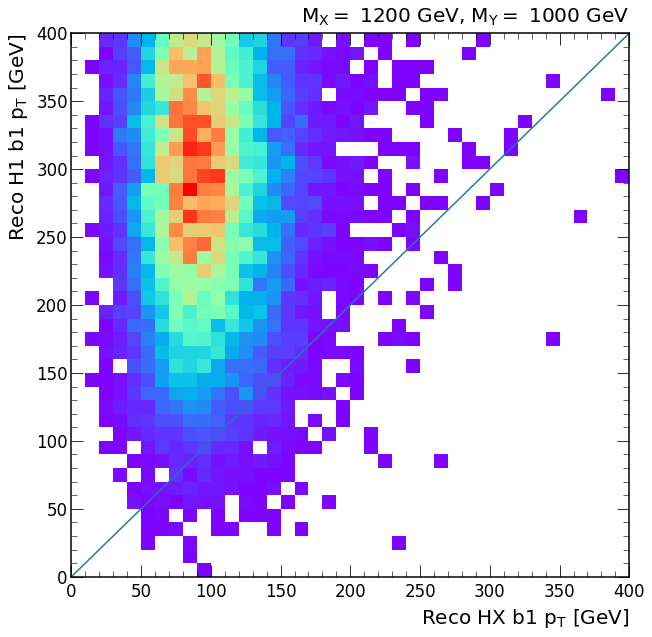

In [19]:
fig, ax = plt.subplots()

n, ex, ey, im = Hist2d(ak.flatten(reco_b_all_H[0].pt), ak.flatten(reco_b_all_H[2].pt), bins=np.linspace(0,400,41), ax=ax, weights=tree.scale)
ax.plot([0,400],[0,400])
# _ = Hist(H1.pt, bins=np.linspace(0,700,41), ax=ax, weights=tree.scale, label='H1')
# _ = Hist(H2.pt, bins=np.linspace(0,700,41), ax=ax, weights=tree.scale, label='H2')

ax.legend()

ax.set_xlabel(r"Reco HX b1 $p_T$ [GeV]")
ax.set_ylabel(r"Reco H1 b1 $p_T$ [GeV]")
# ax.set_ylabel('AU')

ax.set_title(tree.sample)

# fig.savefig(f"plots/1_signal_exploration/topology/{tree.mxmy}_H_pt.pdf")

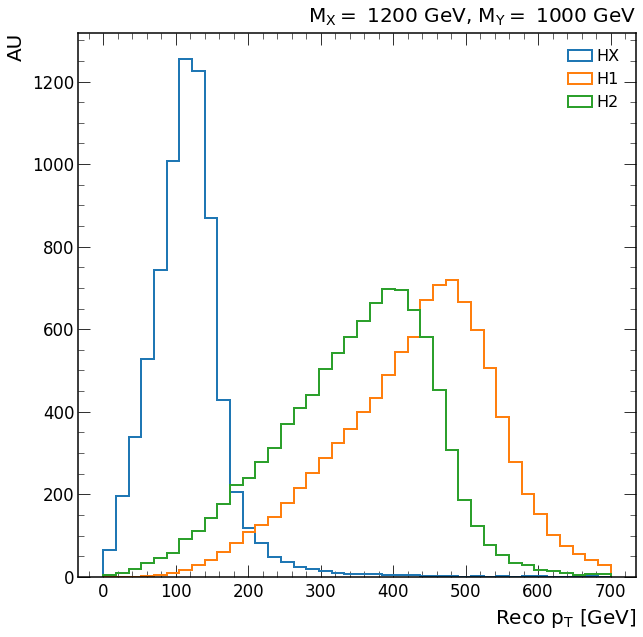

In [18]:
fig, ax = plt.subplots()

_ = Hist(HX.pt, bins=np.linspace(0,700,41), ax=ax, weights=tree.scale, label='HX')
_ = Hist(H1.pt, bins=np.linspace(0,700,41), ax=ax, weights=tree.scale, label='H1')
_ = Hist(H2.pt, bins=np.linspace(0,700,41), ax=ax, weights=tree.scale, label='H2')

ax.legend()

ax.set_xlabel(r"Reco $p_T$ [GeV]")
ax.set_ylabel('AU')

ax.set_title(tree.sample)

fig.savefig(f"plots/1_signal_exploration/topology/{tree.mxmy}_H_pt.pdf")

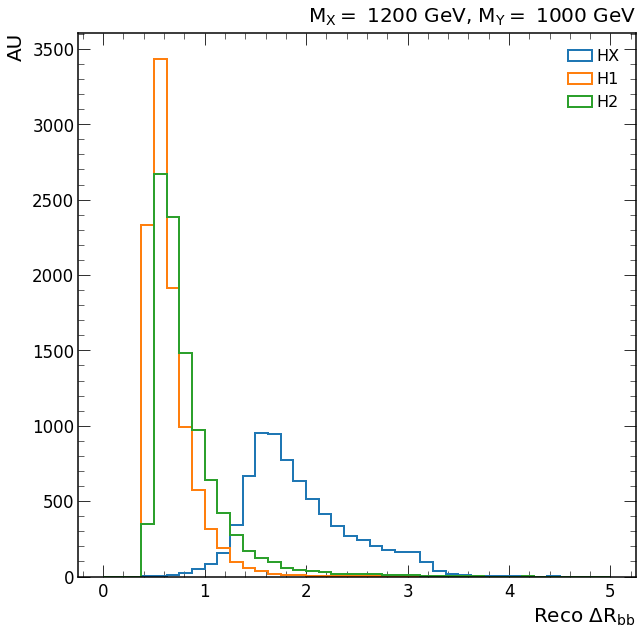

In [20]:
fig, ax = plt.subplots()

_ = Hist(HX_bb_dR, bins=np.linspace(0,5,41), ax=ax, weights=tree.scale, label='HX')
_ = Hist(H1_bb_dR, bins=np.linspace(0,5,41), ax=ax, weights=tree.scale, label='H1')
_ = Hist(H2_bb_dR, bins=np.linspace(0,5,41), ax=ax, weights=tree.scale, label='H2')

ax.legend()

ax.set_xlabel(r"Reco $\Delta R_{bb}$")
ax.set_ylabel('AU')

ax.set_title(tree.sample)

fig.savefig(f"plots/1_signal_exploration/topology/{tree.mxmy}_Hbb_dR.pdf")

In [152]:
id_sort = ak.argsort(tree.jet_signalId, axis=1)

In [187]:
pt_sort = ak.argsort(tree.jet_ptRegressed, axis=1, ascending=False)

In [190]:
pt_sorted_sigID = tree.jet_signalId[pt_sort][tree.jet_signalId[pt_sort] > -1]

In [193]:
all_sixb_mask = ak.count(pt_sorted_sigID, axis=1) == 6

In [195]:
tree.jet_ptRegressed[pt_sort][all_sixb_mask]

<Array [[141, 135, 118, ... 34.4, 27.5, 24.3]] type='17570 * var * float32'>

In [196]:
pt_sorted_sigID

<Array [[0, 4, 2, 1, 3, 5, ... [0, 4, 1, 2, 3]] type='55952 * var * int32'>

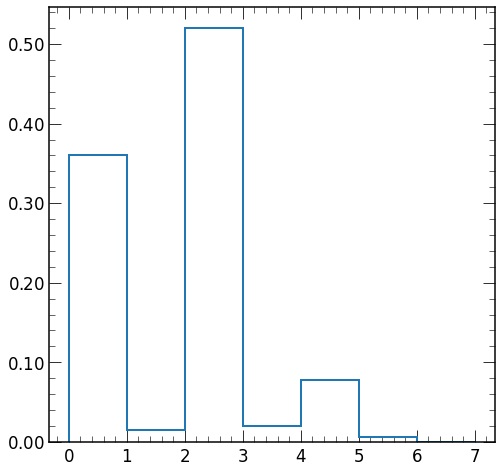

In [197]:
fig, ax = plt.subplots()

_ = Hist(pt_sorted_sigID[:,0], bins=np.arange(8), ax=ax)